<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Заказчик.** «Бета-Банк»

***Цель Заказчика.** Построить систему прогнозирования ухода клиента из банка.

**Цель исследования.** Для сокращения оттока клиентов построить модель со значением метрики F1-меры не менее 0.59. 

**Задачи:**

- Загрузить и подготовить данные.
- Исследовать баланс классов, обучить модель без учёта дисбаланса. 
- Улучшить качество модели, учитывая дисбаланс классов. Обучить разные модели и найти лучшую.
- Провести финальное тестирование.


**Входные данные от Заказчика.** Файл в формате .csv с указанием различных параметров поведения клиентов банка.

**Ожидаемый результат.** Построена модель с уровнем метрики F1-меры не менее 0.59

## Подготовка данных

1. Открыть таблицу 
2. Изучить структуру данных по десяти первым строкам
3. Изучить структуру данных методом `info()`
4. Выявить пропуски и дубликаты

**Описание данных**

**Признаки**

- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата


**Целевой признак**

- `Exited` — факт ухода клиента

In [46]:
# Импотрт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # стандартизация
from sklearn.utils import shuffle # перемешивание
from sklearn.dummy import DummyClassifier # Наивная модель

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import confusion_matrix # матрица "правда / ложь"
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve # график
from sklearn.metrics import roc_auc_score # площадь фигуры по графику

In [47]:
df = pd.read_csv('/datasets/Churn.csv')
display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [49]:
print(df.isna().sum())

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


In [50]:
print(df.duplicated().sum())

0


In [51]:
columns_new = [i for i in list(df.columns)]
columns_unique = [len(df[i].unique()) for i in list(df.columns)]

df_unique = pd.DataFrame({
    'columns': columns_new,
    'values': columns_unique
})

display(df_unique)

,columns,values
0,RowNumber,10000
1,CustomerId,10000
2,Surname,2932
3,CreditScore,460
4,Geography,3
5,Gender,2
6,Age,70
7,Tenure,12
8,Balance,6382
9,NumOfProducts,4


**Порядок изменения подготовки данных**

1.	Изменить названия столбцов, перевести в нижний регистр
2.	Заполнить пропуски в столбце `Tenure` медианным значением ** 
3.	Разделить таблицу на признаки и целевые результаты. При разделении, из признаков удалить столбцы `RowNumber`, `CustomerId`, `Surname`***
4.	Выполнить прямое кодирование для `Geography`, `Gender`
5.	Разделить исходные данные на обучающую, валидационную и тестовую выборки в соотношении 0.6:0.2:0.2
6. Стандартизировать данные

** В таблице более 900 пропусков, что составляет около 9% объема данных. Удалив эти столбцы, мы значительно снизим обучаемость модели. Заполнив пропуски, мы также снизим точность прогнозирования, но в меньшей степени. Это связано с тем, что качество данных будет снижен в одном из 11 параметров, что приведет к общему снижению точности модели менее 1%. Заполнив пропуски средним значением, мы рискуем сместить данные в сторону выбросов. Медианное значение лишено данного недостатка

*** В рамках решения задачи прогнозирования поведения потребителей нет смысла в их персонализации. С другой стороны, излишняя детализация данных сужает возможности обучения модели за счет чрезмерной кластеризации. Поэтому для решения текущей задачи, нам не потребуется информация о фамилии клиента, его ID и номера сделки.



In [52]:
# Введем константу
RANDOM_STATE = 12345

In [53]:
# Приведем названия столбцов в нижний регистр
df.columns = map(str.lower, df.columns)
print(df.columns)

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')


In [54]:
# Заполним пропуски в столбце tenure медианным значением
df['tenure'] = df['tenure'].fillna(df['tenure'].median())
print('Пропусков ', df['tenure'].isna().sum())

Пропусков  0


In [55]:
# Разделим таблицу на признаки и целевые результаты
features = df.drop(['rownumber', 'customerid', 'surname', 'exited'], axis=1)
target = df['exited']

# Выполним прямое кодирование
features = pd.get_dummies(features, drop_first=True)

# Приведем названия новых столбцов в нижний регистр
features.columns = map(str.lower, features.columns)

display(features.head())

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_germany,geography_spain,gender_male
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0


In [56]:
# Разделим исходные данные на обучающую, валидационную и тестовую выборки

features_train, features_long, target_train, target_long = train_test_split(features, target, 
                                                                           test_size=.4,
                                                                           stratify=target,
                                                                           random_state=RANDOM_STATE)
features_valid, features_test, target_valid, target_test = train_test_split(features_long, target_long,
                                                                           test_size=.5,
                                                                           stratify=target_long,
                                                                           random_state=RANDOM_STATE)
print(f'features_train - {features_train.shape[0]} строк')
print(f'features_valid - {features_valid.shape[0]} строк')
print(f'features_test - {features_test.shape[0]} строк')

features_train - 6000 строк
features_valid - 2000 строк
features_test - 2000 строк


In [57]:
# Стандартизируем данные
numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

display(features_train.head())

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_germany,geography_spain,gender_male
2837,-1.040434,0.953312,0.360600,0.774657,-0.914708,0,1,-0.119110,1,0,0
9925,0.454006,-0.095244,-0.002786,1.910540,-0.914708,1,1,-0.258658,0,0,0
8746,0.103585,-0.476537,1.087371,0.481608,0.820981,0,1,1.422836,0,0,1
660,-0.184996,0.190726,-0.002786,0.088439,-0.914708,1,1,-1.160427,1,0,0
3610,-0.720933,1.620574,-1.456328,0.879129,-0.914708,1,0,0.113236,0,0,0


## Исследование задачи

1. Исследовать баланс классов 
2. Обучить модель без учёта дисбаланса

In [58]:
print('Соотношение классов в относительном выражении:') 
print(target_train.value_counts(normalize=True))

Соотношение классов в относительном выражении:
0    0.796333
1    0.203667
Name: exited, dtype: float64


In [59]:
# Обучим модель методом логистической регрессии
model_regres = LogisticRegression()
model_regres.fit(features_train, target_train)
predict_valid = model_regres.predict(features_valid)
f1_valid = f1_score(target_valid, predict_valid)
auc_roc_valid = roc_auc_score(target_valid, predict_valid)
accuracy_valid = accuracy_score(target_valid, predict_valid)
print(f'На модели логистической регрессии значение F1 = {f1_valid:.4f}')
print(f'На модели логистической регрессии значение AUC-ROC = {auc_roc_valid:.4f}')
print(f'На модели логистической регрессии значение accuracy = {accuracy_valid:.4f}')

На модели логистической регрессии значение F1 = 0.3046
На модели логистической регрессии значение AUC-ROC = 0.5848
На модели логистической регрессии значение accuracy = 0.8105


In [60]:
# Создадим константную модель
target_valid_const = pd.Series(0, index=target_valid.index)
accuracy_valid_conct = accuracy_score(target_valid, target_valid_const)
print(f'На константной модели значение accuracy = {accuracy_valid_conct:.4f}')

#Проверка "наивным" алгоритмом
naive_model = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)
naive_model.fit(features_train, target_train)
naive_valid = naive_model.score(features_train, target_train)
print(f'Результат наивного алгоритма = {naive_valid:.4f}')

На константной модели значение accuracy = 0.7960
Результат наивного алгоритма = 0.7963


In [61]:
# Создадим функцию для построения ROC-кривой
def auc_figure(features, target, model):
    predict_proba_valid = model.predict_proba(features)
    predict_proba_one_valid = predict_proba_valid[:, 1]
    fpr, tpr, tresholds = roc_curve(target, predict_proba_one_valid)
    
    plt.figure
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    return plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

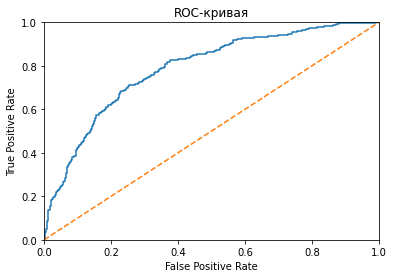

In [62]:
# Построим ROC-кривую
auc_figure(features_valid, target_valid, model_regres)

**Выводы**

Модель, обученная методом логистической регрессии, показала низкий уровень значения F1 – 0.33, что не достигает целевого уровня. Не смотря на высокое значение показателя AUC-ROC – 0.59, что говорит о хорошей подготовке данных, текущий уровень модели еще недостаточный.

Недостаточность точности предсказаний модели подтверждается еще и тем фактором, что значение ее accuracy составляет 0.8, что соответствует значению accuracy константной модели 0.79 и значению наивного алгоритма – 0.8.

Учитывая соотношение классов модели 0.8:0.2, можно с увереннсотью говорить, что модели явно не хватает точности предсказания

Таким образом, сейчас требуется снижение дисбаланса данных и использования иных способов построения прогноза

## Борьба с дисбалансом

Устранить дисбаланс методами:
- Взвешивания классов
- Повышение выборки
- Понижения выборки

По каждому методу построить модель линейной регрессии, решающего дерева и случайного леса с различными гиперпараметрами

Выбрать лучшую модель для финального тестирования

In [63]:
# Создадим списки для фиксации лучших моделией и значений их метрик F1
best_model_all = []
best_result_f1_all = []

**Дерево решений** Обучим модели на параметре `max_depth` от 5 до 10 **с использованием взвешивания классов**

Проверим методом `F1` и `AUC-ROC` на валидационной выборке. Лучшую модель сохраним для дальнейшего сравнения на тестовой выборке

In [64]:
best_model_tree_balans = None
best_result_tree_balans = 0
best_depth_tree_balans = 0
best_auc_roc_tree_balans = 0

for depth in range(5, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_STATE, class_weight='balanced')
    model.fit(features_train, target_train)
    predict_valid = model.predict(features_valid)
    f1_valid = f1_score(target_valid, predict_valid)
    auc_roc_valid = roc_auc_score(target_valid, predict_valid)
    print(f'При глубине {depth} значение F1 {f1_valid:.4f}')
    if best_result_tree_balans < f1_valid:
        best_result_tree_balans = f1_valid
        best_depth_tree_balans = depth
        best_model_tree_balans = model
        best_auc_roc_tree_balans = auc_roc_valid

best_model_all.append(best_model_tree_balans)
best_result_f1_all.append(best_result_tree_balans)
print(f'Лучший результат F1 {best_result_tree_balans:.4f} у модели с глубиной {best_depth_tree_balans}')
print(f'Лучший результат AUC-ROC {best_auc_roc_tree_balans:.4f}')


При глубине 5 значение F1 0.5546
При глубине 6 значение F1 0.5759
При глубине 7 значение F1 0.5725
При глубине 8 значение F1 0.5479
При глубине 9 значение F1 0.5405
При глубине 10 значение F1 0.5350
Лучший результат F1 0.5759 у модели с глубиной 6
Лучший результат AUC-ROC 0.7677


<function matplotlib.pyplot.show(close=None, block=None)>

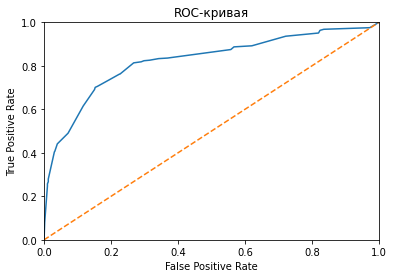

In [65]:
# Построим ROC-кривую
auc_figure(features_valid, target_valid, best_model_tree_balans)

**Случайный лес**

Обучим модели **с использованием взвешивания классов** со следующими гиперпараметрами:

- с максимальной глубиной от 5 до 10
- для дучщей модели по максимальной глкбине - с количеством деревьев: от 50 до 150 с шагом 50,

Проверим методом `F1` на валидационной выборке. Лучшую модель проверим методом `AUC-ROC` и сохраним для дальнейшего сравнения на тестовой выборке

In [66]:
best_model_forest_balans = None
best_result_forest_balans = 0
best_est_forest_balans = 0
best_depth_forest_balans = 0
best_auc_roc_forest_balans = 0

# Определим лучшую модель меняя мксимальную глубину
for depth in range(5, 11):
    model = RandomForestClassifier(random_state=RANDOM_STATE,
                                   n_estimators=20, 
                                   max_depth=depth, 
                                   class_weight='balanced')
    model.fit(features_train, target_train)
    predict_valid = model.predict(features_valid)
    f1_valid = f1_score(target_valid, predict_valid)
    auc_roc_valid = roc_auc_score(target_valid, predict_valid)
    print(f'При глубине {depth} и числе деревьев {20} значение F1 {f1_valid:.4f}')
    if best_result_forest_balans < f1_valid:
        best_result_forest_balans = f1_valid
        best_depth_forest_balans = depth
        best_est_forest_balans = 20
        best_model_forest_balans = model
        best_auc_roc_forest_balans = auc_roc_valid

# Улучшим модель меняя число деревьев
for est in range(50, 151, 50):
    model = RandomForestClassifier(random_state=RANDOM_STATE,
                                   n_estimators=est, 
                                   max_depth=best_depth_forest_balans, 
                                   class_weight='balanced')
    model.fit(features_train, target_train)
    predict_valid = model.predict(features_valid)
    f1_valid = f1_score(target_valid, predict_valid)
    auc_roc_valid = roc_auc_score(target_valid, predict_valid)
    print(f'При глубине {best_depth_forest_balans} и числе деревьев {est} значение F1 {f1_valid:.4f}')
    if best_result_forest_balans < f1_valid:
        best_result_forest_balans = f1_valid
        best_est_forest_balans = est
        best_model_forest_balans = model
        best_auc_roc_forest_balans = auc_roc_valid

best_model_all.append(best_model_forest_balans)
best_result_f1_all.append(best_result_forest_balans)
print(f'Лучший результат F1 {best_result_forest_balans:.4f} \
у модели с глубиной {best_depth_forest_balans} и числом деревьев {best_est_forest_balans}')
print(f'Лучший результат AUC-ROC {best_auc_roc_forest_balans:.4f}')

При глубине 5 и числе деревьев 20 значение F1 0.6177
При глубине 6 и числе деревьев 20 значение F1 0.6178
При глубине 7 и числе деревьев 20 значение F1 0.6251
При глубине 8 и числе деревьев 20 значение F1 0.6359
При глубине 9 и числе деревьев 20 значение F1 0.6486
При глубине 10 и числе деревьев 20 значение F1 0.6331
При глубине 9 и числе деревьев 50 значение F1 0.6371
При глубине 9 и числе деревьев 100 значение F1 0.6397
При глубине 9 и числе деревьев 150 значение F1 0.6349
Лучший результат F1 0.6486 у модели с глубиной 9 и числом деревьев 20
Лучший результат AUC-ROC 0.7926


<function matplotlib.pyplot.show(close=None, block=None)>

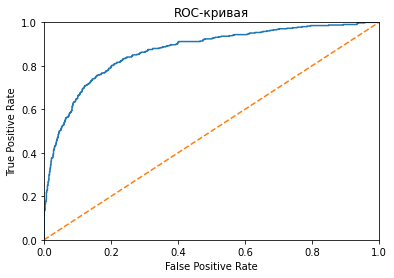

In [67]:
# Построим ROC-кривую
auc_figure(features_valid, target_valid, best_model_forest_balans)

**Логистическая регрессия** Обучим модель **с использованием взвешивания классов**

Проверим методом `F1` и `AUC-ROC` на валидационной выборке. Модель сохраним для дальнейшего сравнения на тестовой выборке

In [68]:
model_regres_balans = LogisticRegression(class_weight='balanced')
model_regres_balans.fit(features_train, target_train)
predict_valid_regres_balans = model_regres_balans.predict(features_valid)
f1_valid_regres_balans = f1_score(target_valid, predict_valid_regres_balans)
auc_roc_regres_balans = roc_auc_score(target_valid, predict_valid_regres_balans)

print(f'На модели логистической регрессии с балансом классов значение F1 = {f1_valid_regres_balans:.4f}')
print(f'На модели логистической регрессии с балансом классов значение AUC-ROC = {auc_roc_regres_balans:.4f}')
best_model_all.append(model_regres_balans)
best_result_f1_all.append(f1_valid_regres_balans)

На модели логистической регрессии с балансом классов значение F1 = 0.5285
На модели логистической регрессии с балансом классов значение AUC-ROC = 0.7338


<function matplotlib.pyplot.show(close=None, block=None)>

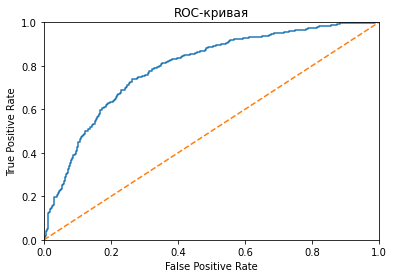

In [69]:
# Построим ROC-кривую
auc_figure(features_valid, target_valid, model_regres_balans)

У лучшей модели решающего дерева значение `F1` составляет 0.5964.  

У модели логистической регрессии значение `F1` составляет 0.4889.

У лучшей модели случайного леса значение `F1` составляет 0.6265.

С учетом того факта, что значение `F1` у модели случайного леса стабильно выше, то в дальнейшем устранении дисбаланса будет использована только эта модель 

**Увеличение выборки**

Учитывая текущее соотношение целевого признака `zero-0.8 : one-0.2`, **увеличим количество положительных признаков в четыре раза**

Обучим модели методом **Случайный лес** со следующими гиперпараметрами:

- с максимальной глубиной от 5 до 10
- для дучщей модели по максимальной глкбине - с количеством деревьев: от 50 до 150 с шагом 50,

Проверим методом `F1` на валидационной выборке. Лучшую модель проверим методом `AUC-ROC` и сохраним для дальнейшего сравнения на тестовой выборке

In [70]:
# Разделим выборку
features_one = features_train[target_train==1]
features_zero = features_train[target_train==0]
target_one = target_train[target_train==1]
target_zero = target_train[target_train==0]

# Увеличим положительный класс и объединим таблицы
one_height = 4
features_upsampled = pd.concat([features_zero] + [features_one] * one_height)
target_upsampled = pd.concat([target_zero] + [target_one] * one_height)

# Перемешаем данные
features_upsampled = shuffle(features_upsampled, random_state=RANDOM_STATE)
target_upsampled = shuffle(target_upsampled, random_state=RANDOM_STATE)

print('features_upsampled', features_upsampled.shape)
print('target_upsampled', target_upsampled.shape)

features_upsampled (9666, 11)
target_upsampled (9666,)


In [71]:
best_model_forest_height = None
best_result_forest_height = 0
best_est_forest_height = 0
best_depth_forest_height = 0
best_auc_roc_forest_height = 0

# Определим лучшую модель меняя мксимальную глубину
for depth in range(5, 11):
    model = RandomForestClassifier(random_state=RANDOM_STATE,
                                   n_estimators=20, 
                                   max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predict_valid = model.predict(features_valid)
    f1_valid = f1_score(target_valid, predict_valid)
    auc_roc_valid = roc_auc_score(target_valid, predict_valid)
    print(f'При глубине {depth} и числе деревьев {20} значение F1 {f1_valid:.4f}')
    if best_result_forest_height < f1_valid:
        best_result_forest_height = f1_valid
        best_depth_forest_height = depth
        best_est_forest_height = 20
        best_model_forest_height = model
        best_auc_roc_forest_height = auc_roc_valid

# Улучшим модель меняя число деревьев
for est in range(50, 151, 50):
    model = RandomForestClassifier(random_state=RANDOM_STATE,
                                   n_estimators=est, 
                                   max_depth=best_depth_forest_balans)
    model.fit(features_upsampled, target_upsampled)
    predict_valid = model.predict(features_valid)
    f1_valid = f1_score(target_valid, predict_valid)
    auc_roc_valid = roc_auc_score(target_valid, predict_valid)
    print(f'При глубине {best_depth_forest_balans} и числе деревьев {est} значение F1 {f1_valid:.4f}')
    if best_result_forest_height < f1_valid:
        best_result_forest_height = f1_valid
        best_est_forest_height = est
        best_model_forest_height = model
        best_auc_roc_forest_height = auc_roc_valid

best_model_all.append(best_model_forest_height)
best_result_f1_all.append(best_result_forest_height)
print(f'Лучший результат F1 {best_result_forest_height:.4f} \
у модели с глубиной {best_depth_forest_height} и числом деревьев {best_est_forest_height}')
print(f'Лучший результат AUC-ROC {best_auc_roc_forest_height:.4f}')

При глубине 5 и числе деревьев 20 значение F1 0.6101
При глубине 6 и числе деревьев 20 значение F1 0.6225
При глубине 7 и числе деревьев 20 значение F1 0.6306
При глубине 8 и числе деревьев 20 значение F1 0.6383
При глубине 9 и числе деревьев 20 значение F1 0.6222
При глубине 10 и числе деревьев 20 значение F1 0.6393
При глубине 9 и числе деревьев 50 значение F1 0.6333
При глубине 9 и числе деревьев 100 значение F1 0.6374
При глубине 9 и числе деревьев 150 значение F1 0.6429
Лучший результат F1 0.6429 у модели с глубиной 10 и числом деревьев 150
Лучший результат AUC-ROC 0.7952


<function matplotlib.pyplot.show(close=None, block=None)>

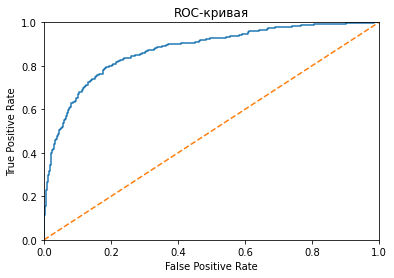

In [72]:
# Построим ROC-кривую
auc_figure(features_valid, target_valid, best_model_forest_height)

**Уменьшение выборки**

Учитывая текущее соотношение целевого признака `zero-0.8 : one-0.2`, **уменьшим количество отрицательных признаков в четыре раза**

Обучим модели методом **Случайный лес** со следующими гиперпараметрами:

- с максимальной глубиной от 5 до 10
- для дучщей модели по максимальной глкбине - с количеством деревьев: от 50 до 150 с шагом 50,

Проверим методом `F1` на валидационной выборке. Лучшую модель проверим методом `AUC-ROC` и сохраним для дальнейшего сравнения на тестовой выборке

In [73]:
# Уменьшим выборку используя уже разделенные таблицы
zero_down = 0.25
features_downsampled = pd.concat([features_zero.sample(frac=zero_down, random_state=RANDOM_STATE)] + [features_one])
target_downsampled = pd.concat([target_zero.sample(frac=zero_down, random_state=RANDOM_STATE)] + [target_one])

# Перемешаем данные
features_downsampled, target_downsampled = shuffle(features_downsampled, 
                                                   target_downsampled,
                                                   random_state=RANDOM_STATE)

print('features_downsampled', features_downsampled.shape)
print('target_downsampled', target_downsampled.shape)

features_downsampled (2416, 11)
target_downsampled (2416,)


In [74]:
best_model_forest_down = None
best_result_forest_down = 0
best_est_forest_down = 0
best_depth_forest_down = 0
best_auc_roc_forest_down = 0

# Определим лучшую модель меняя мксимальную глубину
for depth in range(5, 11):
    model = RandomForestClassifier(random_state=RANDOM_STATE,
                                   n_estimators=20, 
                                   max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    predict_valid = model.predict(features_valid)
    f1_valid = f1_score(target_valid, predict_valid)
    auc_roc_valid = roc_auc_score(target_valid, predict_valid)
    print(f'При глубине {depth} и числе деревьев {20} значение F1 {f1_valid:.4f}')
    if best_result_forest_down < f1_valid:
        best_result_forest_down = f1_valid
        best_depth_forest_down = depth
        best_est_forest_down = 20
        best_model_forest_down = model
        best_auc_roc_forest_down = auc_roc_valid

# Улучшим модель меняя число деревьев
for est in range(50, 151, 50):
    model = RandomForestClassifier(random_state=RANDOM_STATE,
                                   n_estimators=est, 
                                   max_depth=best_depth_forest_balans)
    model.fit(features_downsampled, target_downsampled)
    predict_valid = model.predict(features_valid)
    f1_valid = f1_score(target_valid, predict_valid)
    auc_roc_valid = roc_auc_score(target_valid, predict_valid)
    print(f'При глубине {best_depth_forest_down} и числе деревьев {est} значение F1 {f1_valid:.4f}')
    if best_result_forest_down < f1_valid:
        best_result_forest_down = f1_valid
        best_est_forest_down = est
        best_model_forest_down = model
        best_auc_roc_forest_down = auc_roc_valid

best_model_all.append(best_model_forest_down)
best_result_f1_all.append(best_result_forest_down)
print(f'Лучший результат F1 {best_result_forest_down:.4f} \
у модели с глубиной {best_depth_forest_down} и числом деревьев {best_est_forest_down}')
print(f'Лучший результат AUC-ROC {best_auc_roc_forest_down:.4f}')

При глубине 5 и числе деревьев 20 значение F1 0.6246
При глубине 6 и числе деревьев 20 значение F1 0.6325
При глубине 7 и числе деревьев 20 значение F1 0.6362
При глубине 8 и числе деревьев 20 значение F1 0.6050
При глубине 9 и числе деревьев 20 значение F1 0.6047
При глубине 10 и числе деревьев 20 значение F1 0.5958
При глубине 7 и числе деревьев 50 значение F1 0.6157
При глубине 7 и числе деревьев 100 значение F1 0.6237
При глубине 7 и числе деревьев 150 значение F1 0.6250
Лучший результат F1 0.6362 у модели с глубиной 7 и числом деревьев 20
Лучший результат AUC-ROC 0.8087


<function matplotlib.pyplot.show(close=None, block=None)>

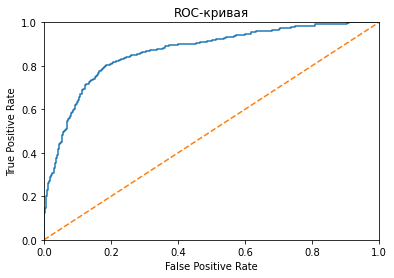

In [75]:
# Построим ROC-кривую
auc_figure(features_valid, target_valid, best_model_forest_down)

In [76]:
f1_for_test = 0
model_for_test = None
for i in range(len(best_result_f1_all)):
    if f1_for_test < best_result_f1_all[i]:
        f1_for_test = best_result_f1_all[i]
        model_for_test = best_model_all[i]
print(f'Лучшее значение F1 {f1_for_test:.4f} у модели {model_for_test}')

Лучшее значение F1 0.6486 у модели RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=20,
                       random_state=12345)


**Выводы**

Для повышения сбалансированности модели применено:

1. **Взвешивание классов**. На данном параметре исследована метрика `F1` для моделей `Логистической регрессии`, `Решающего дерева` и `Случайного леса`. Значение `F1` у модели `Случайного леса` стабильно выше остальных моделей, что дало основание использовать в дальнейшем только эту модель. У лучшей модели `Случайного леса` значение `F1` составляет **0.6265**.

2. **Увеличение выборки**. Учитывая текущее соотношение целевого признака `zero-0.8 : one-0.2`, было увеличено количество положительных признаков в четыре раза. У лучшей модели `Случайного леса` при увеличенной выборке значение `F1` составляет **0.6222**.

3. **Уменьшение выборки**. Учитывая текущее соотношение целевого признака `zero-0.8 : one-0.2`, уменьшено количество отрицательных признаков в четыре раза. У лучшей модели `Случайного леса` при уменьшенной выборке значение `F1` составляет **0.6073**.

Таким образом, лучший показатель у модели `Случайного леса` с взвешенными классами. Она и будет использована при проверке на тестовой выборке

## Тестирование модели

In [77]:
# Проверим модель model_for_test на тестовой выборке
predict_test = model_for_test.predict(features_test)
f1_test = f1_score(target_test, predict_test)
auc_roc_test = roc_auc_score(target_test, predict_test)
print(F'На тестовой выборке у лучшей модели {model_for_test} \
F1 составляет: {f1_test:.4f}')
print(f'Результат AUC-ROC {auc_roc_test:.4f}')

На тестовой выборке у лучшей модели RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=20,
                       random_state=12345) F1 составляет: 0.6129
Результат AUC-ROC 0.7635


<function matplotlib.pyplot.show(close=None, block=None)>

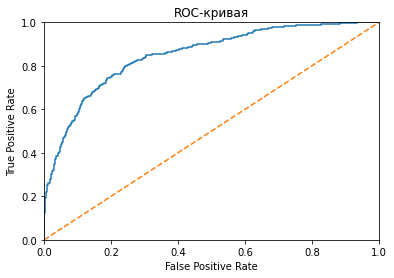

In [78]:
# Построим ROC-кривую
auc_figure(features_test, target_test, model_for_test)

Улучшим качество модели дополнительным обучением

In [79]:
# Объединим обучающюю и валидационную выборки
target_train_all = pd.concat([target_train, target_valid], sort=False, axis=0)
features_train_all = features_train.append(features_valid, sort=False)
print(f'В выборке features_train_all {features_train_all.shape[0]} строк')

В выборке features_train_all 8000 строк


In [80]:
# Обучим модель еще раз на объедтненной выборке
model_for_test.fit(features_train_all, target_train_all)
predict_forest_all = model_for_test.predict(features_test)
f1_test_all = f1_score(target_test, predict_forest_all)
auc_roc_test_all = roc_auc_score(target_test, predict_forest_all)

print(F'На тестовой выборке у улучшеной модели {model_for_test} \
accuracy составляет: {f1_test_all:.4f}')
print(f'Результат AUC-ROC {auc_roc_test_all:.4f}')

На тестовой выборке у улучшеной модели RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=20,
                       random_state=12345) accuracy составляет: 0.5952
Результат AUC-ROC 0.7550


<function matplotlib.pyplot.show(close=None, block=None)>

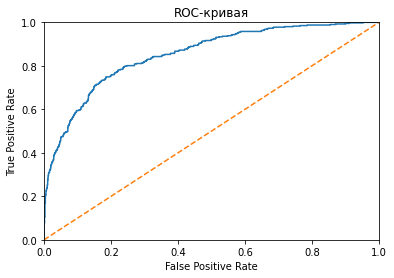

In [81]:
# Построим ROC-кривую
auc_figure(features_test, target_test, model_for_test)

**Выводы**

На тестовой выборке модель `Случайного леса` с взвешенными классами показала значение `F1` 0.6094. Значение `AUC-ROC` составило 0.7625

Для улучшения качества модели, была объединена обучающая и валидационная выборки и модель обучена повторно на новой выборке. После обучения проверка на тестовой выборке показало рост значения `F1`, которое составило 0.6190, а значение `AUC-ROC` составило 0.7718.

Таким образом, ожидаемый результат достигнут, построена модель с уровнем метрики `F1-меры` более 0.59